In [1]:
%load_ext autoreload
%autoreload 2

import cfr
import os
os.chdir('/glade/u/home/fengzhu/Github/cfr/docsrc/notebooks/')

In [2]:
job = cfr.ReconJob()
job.load_proxydb('PAGES2kv2')

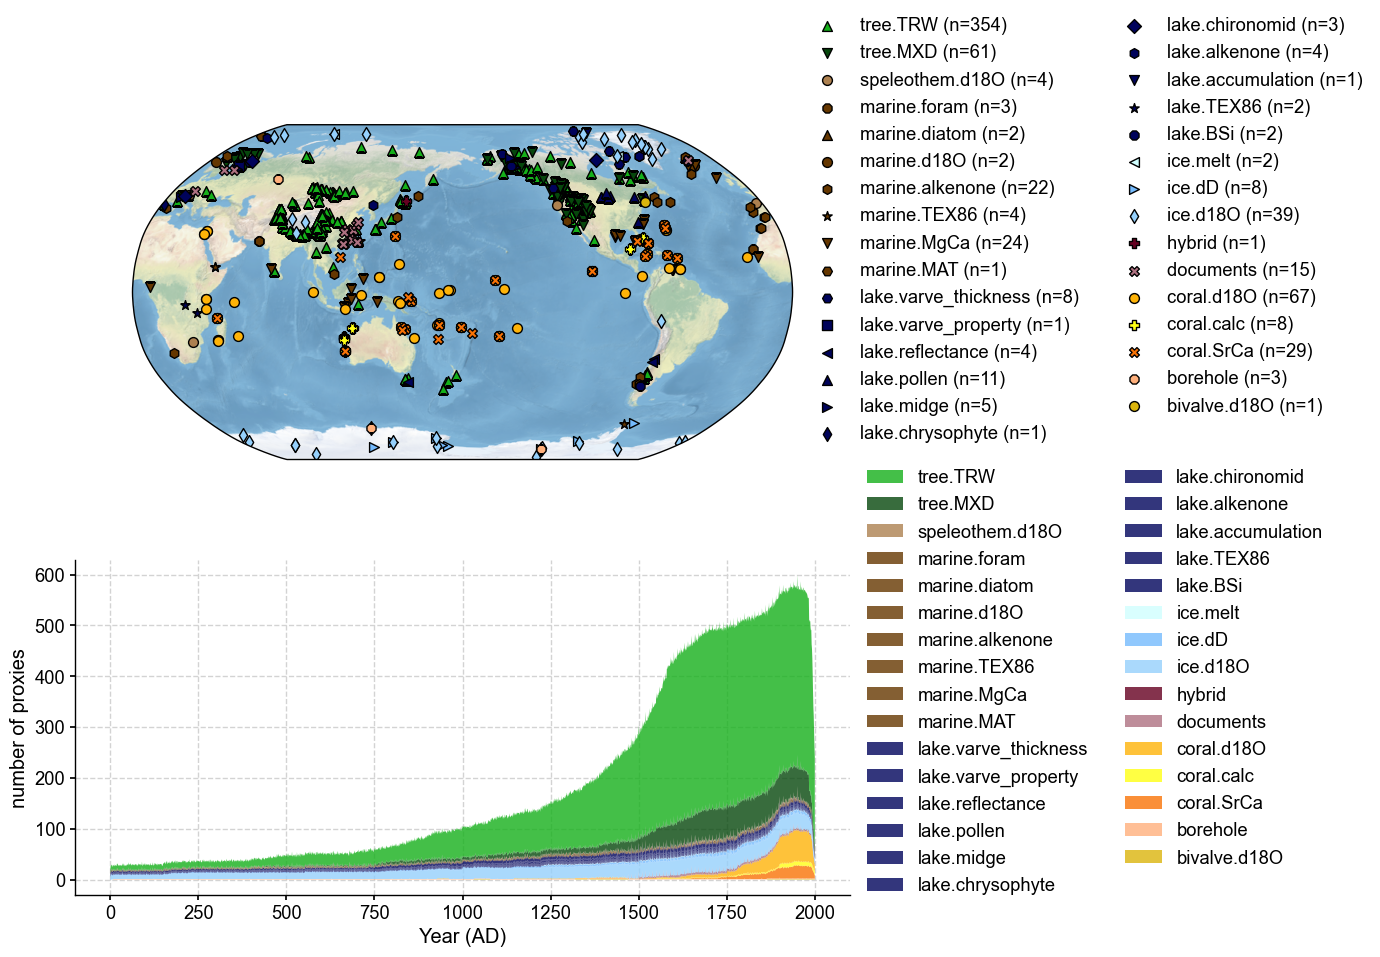

In [3]:
fig, ax = job.proxydb.plot(plot_count=True)

In [4]:
job.filter_proxydb(by='ptype', keys=['coral'])
job.annualize_proxydb(months=[12, 1, 2], ptypes=['coral'])

Annualizing ProxyDatabase: 100%|██████████| 104/104 [00:04<00:00, 21.27it/s]


In [5]:
job.load_clim(
    tag='prior',
    path_dict={
        'tas': 'iCESM_past1000historical/tas',
    },
    anom_period=(1951, 1980),
)

>>> The target file seems existed at: ./data/tas_sfc_Amon_iCESM_past1000historical_085001-200512.nc . Loading from it instead of downloading ...


In [6]:
job.load_clim(
    tag='obs',
    path_dict={
        'tas': 'gistemp1200_GHCNv4_ERSSTv5',
    },
    rename_dict={'tas': 'tempanomaly'},
    anom_period=(1951, 1980),
)

>>> The target file seems existed at: ./data/gistemp1200_GHCNv4_ERSSTv5.nc.gz . Loading from it instead of downloading ...


In [7]:
ptype_psm_dict = {
    'coral.d18O': 'Linear',
    'coral.calc': 'Linear',
    'coral.SrCa': 'Linear',
}

ptype_season_dict = {
    'coral.d18O': [12, 1, 2],
    'coral.calc': [12, 1, 2],
    'coral.SrCa': [12, 1, 2],
}

job.calib_psms(
    ptype_psm_dict=ptype_psm_dict,
    ptype_season_dict=ptype_season_dict,
    calib_period=(1850, 2015),
    verbose=True,
)

>>> job.configs["ptype_psm_dict"] = {'coral.SrCa': 'Linear', 'coral.d18O': 'Linear', 'coral.calc': 'Linear'}
>>> job.configs["ptype_season_dict"] = {'coral.SrCa': [12, 1, 2], 'coral.d18O': [12, 1, 2], 'coral.calc': [12, 1, 2]}
>>> job.configs["psm_calib_period"] = (1850, 2015)


Calibrating the PSMs:  16%|█▋        | 17/104 [00:00<00:04, 20.82it/s]

The number of overlapped data points is 14 < 25. Skipping ...
The number of overlapped data points is 20 < 25. Skipping ...
The number of overlapped data points is 22 < 25. Skipping ...


Calibrating the PSMs:  28%|██▊       | 29/104 [00:01<00:03, 20.78it/s]

The number of overlapped data points is 9 < 25. Skipping ...
The number of overlapped data points is 24 < 25. Skipping ...


Calibrating the PSMs:  54%|█████▍    | 56/104 [00:02<00:02, 20.12it/s]

The number of overlapped data points is 22 < 25. Skipping ...
The number of overlapped data points is 22 < 25. Skipping ...


Calibrating the PSMs:  60%|█████▉    | 62/104 [00:03<00:02, 20.22it/s]

The number of overlapped data points is 0 < 25. Skipping ...


Calibrating the PSMs:  75%|███████▌  | 78/104 [00:03<00:01, 20.07it/s]

The number of overlapped data points is 21 < 25. Skipping ...


Calibrating the PSMs: 100%|██████████| 104/104 [00:05<00:00, 19.73it/s]

>>> PSM for Ocn_144 failed to be calibrated.
>>> PSM for Ocn_149 failed to be calibrated.
>>> PSM for Ocn_150 failed to be calibrated.
>>> PSM for Ocn_145 failed to be calibrated.
>>> PSM for Ocn_152 failed to be calibrated.
>>> PSM for Ocn_164 failed to be calibrated.
>>> PSM for Ocn_165 failed to be calibrated.
>>> PSM for Ocn_138 failed to be calibrated.
>>> PSM for Ocn_183 failed to be calibrated.
>>> 95 records tagged "calibrated" with ProxyRecord.psm created


In [8]:
job.forward_psms()

Forwarding the PSMs: 100%|██████████| 95/95 [00:27<00:00,  3.46it/s]


In [9]:
job.annualize_clim(tag='prior', months=[12, 1, 2], verbose=True)
job.regrid_clim(tag='prior', nlat=42, nlon=63, verbose=True)
job.crop_clim(tag='prior', lat_min=-35, lat_max=35, verbose=True)

>>> job.configs["prior_annualize_months"] = [12, 1, 2]
>>> Processing tas ...
>>> job.prior updated
>>> job.configs["prior_regrid_nlat"] = 42
>>> job.configs["prior_regrid_nlon"] = 63
>>> Processing tas ...
>>> job.configs["prior_lat_min"] = -35
>>> job.configs["prior_lat_max"] = 35
>>> job.configs["prior_lon_min"] = 0
>>> job.configs["prior_lon_max"] = 360
>>> Processing tas ...


In [10]:
job.run_da_mc(
    save_dirpath='./recons/lmr-real-pages2k',
    recon_seeds=list(range(1, 11)),
    verbose=True,
)

>>> job.configs["recon_period"] = [0, 2000]
>>> job.configs["recon_loc_rad"] = 25000
>>> job.configs["recon_timescale"] = 1
>>> job.configs["recon_vars"] = ['tas']
>>> job.configs["nens"] = 100
>>> job.configs["recon_seeds"] = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
>>> job.configs["assim_frac"] = 0.75
>>> job.configs["save_dirpath"] = ./recons/lmr-real-pages2k
>>> job.configs["compress_params"] = {'zlib': True}
>>> job.configs["output_full_ens"] = False
>>> job.configs["recon_sampling_mode"] = fixed
>>> job.configs["trim_prior"] = True
>>> job.configs["allownan"] = False
>>> seed: 1 | max: 10


KF updating: 100%|██████████| 2001/2001 [00:16<00:00, 121.80it/s]


>>> Reconstructed fields saved to: ./recons/lmr-real-pages2k/job_r01_recon.nc
>>> seed: 2 | max: 10


KF updating: 100%|██████████| 2001/2001 [00:19<00:00, 103.35it/s]


>>> Reconstructed fields saved to: ./recons/lmr-real-pages2k/job_r02_recon.nc
>>> seed: 3 | max: 10


KF updating: 100%|██████████| 2001/2001 [00:20<00:00, 95.90it/s] 


>>> Reconstructed fields saved to: ./recons/lmr-real-pages2k/job_r03_recon.nc
>>> seed: 4 | max: 10


KF updating: 100%|██████████| 2001/2001 [00:21<00:00, 94.73it/s] 


>>> Reconstructed fields saved to: ./recons/lmr-real-pages2k/job_r04_recon.nc
>>> seed: 5 | max: 10


KF updating: 100%|██████████| 2001/2001 [00:21<00:00, 91.88it/s] 


>>> Reconstructed fields saved to: ./recons/lmr-real-pages2k/job_r05_recon.nc
>>> seed: 6 | max: 10


KF updating: 100%|██████████| 2001/2001 [00:21<00:00, 92.15it/s] 


>>> Reconstructed fields saved to: ./recons/lmr-real-pages2k/job_r06_recon.nc
>>> seed: 7 | max: 10


KF updating: 100%|██████████| 2001/2001 [00:21<00:00, 92.37it/s] 


>>> Reconstructed fields saved to: ./recons/lmr-real-pages2k/job_r07_recon.nc
>>> seed: 8 | max: 10


KF updating: 100%|██████████| 2001/2001 [00:21<00:00, 91.57it/s] 


>>> Reconstructed fields saved to: ./recons/lmr-real-pages2k/job_r08_recon.nc
>>> seed: 9 | max: 10


KF updating: 100%|██████████| 2001/2001 [00:22<00:00, 90.68it/s] 


>>> Reconstructed fields saved to: ./recons/lmr-real-pages2k/job_r09_recon.nc
>>> seed: 10 | max: 10


KF updating: 100%|██████████| 2001/2001 [00:21<00:00, 92.32it/s] 


>>> Reconstructed fields saved to: ./recons/lmr-real-pages2k/job_r10_recon.nc
>>> DONE! Total time spent: 4.86 mins.


In [11]:
res = cfr.ReconRes('./recons/lmr-real-pages2k')
res.load(['nino3.4', 'tas'], verbose=True)

>>> ReconRes.recons["nino3.4"] created
>>> ReconRes.da["nino3.4"] created
>>> ReconRes.recons["tas"] created
>>> ReconRes.da["tas"] created


In [12]:
target = cfr.ClimateField().fetch('20CRv3/tas', vn='air').rename('tas').get_anom((1951, 1980))

>>> The target file seems existed at: ./data/air.2m.mon.mean.nc . Loading from it instead of downloading ...


In [13]:
target = target.annualize(months=[12, 1, 2]).crop(lat_min=-35, lat_max=35)
target.da

<xarray.DataArray 'tas' (time: 181, lat: 71, lon: 360)>
array([[[-0.72366333, -0.75071716, -0.7328949 , ..., -0.7309723 ,
         -0.68304443, -0.675354  ],
        [-0.8072052 , -0.80418396, -0.7583313 , ..., -0.771698  ,
         -0.745224  , -0.7675171 ],
        [-0.7741394 , -0.765152  , -0.7289276 , ..., -0.80792236,
         -0.77575684, -0.7703705 ],
        ...,
        [-1.9167633 , -2.0245056 , -2.1382446 , ..., -1.4160156 ,
         -1.6085968 , -1.7595978 ],
        [-1.7813721 , -1.8453217 , -1.94104   , ..., -1.3635254 ,
         -1.518753  , -1.6648407 ],
        [-1.681366  , -1.8431091 , -1.9763184 , ..., -0.9181824 ,
         -1.0700226 , -1.392273  ]],

       [[-0.885142  , -0.8900859 , -0.90685016, ..., -0.9297587 ,
         -0.871226  , -0.86743164],
        [-1.0433044 , -1.0435995 , -1.0353903 , ..., -0.95008343,
         -0.95111084, -1.0016378 ],
        [-1.1193441 , -1.1181844 , -1.1027933 , ..., -1.0076599 ,
         -1.0325216 , -1.0857443 ],
...
        [-0.7697449 , -0.6768901 , -0.5923462 , ..., -0.56062824,
         -0.68392944, -0.78031415],
        [-0.87024945, -0.837382  , -0.76048785, ..., -0.61620075,
         -0.72455853, -0.82958984],
        [-0.6300557 , -0.6863912 , -0.7022502 , ..., -0.12608846,
         -0.24433391, -0.4693502 ]],

       [[ 1.1114197 ,  1.1156616 ,  1.1440125 , ...,  1.1346741 ,
          1.0916748 ,  1.070221  ],
        [ 0.9642334 ,  1.019104  ,  1.1342773 , ...,  1.1085205 ,
          1.0567322 ,  0.9859314 ],
        [ 0.92681885,  0.9468384 ,  0.9932251 , ...,  1.0208435 ,
          1.0012512 ,  0.94000244],
        ...,
        [ 1.573761  ,  1.3674316 ,  1.1996155 , ...,  2.4711304 ,
          2.2483215 ,  1.8666077 ],
        [ 2.556244  ,  2.3460693 ,  2.0101624 , ...,  3.1957703 ,
          3.0577087 ,  2.749237  ],
        [ 3.0726013 ,  2.9905396 ,  2.7269592 , ...,  2.7269897 ,
          2.9135742 ,  3.011139  ]]], dtype=float32)
Coordinates:
  * lat      (lat) float32 -35.0 -34.0 -33.0 -32.0 -31.0 ... 32.0 33.0 34.0 35.0
  * lon      (lon) float32 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
  * time     (time) int64 1836 1837 1838 1839 1840 ... 2012 2013 2014 2015 2016
Attributes:
    annualized:  1

/glade/work/fengzhu/conda-envs/cfr-env/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1872: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/glade/work/fengzhu/conda-envs/cfr-env/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1872: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


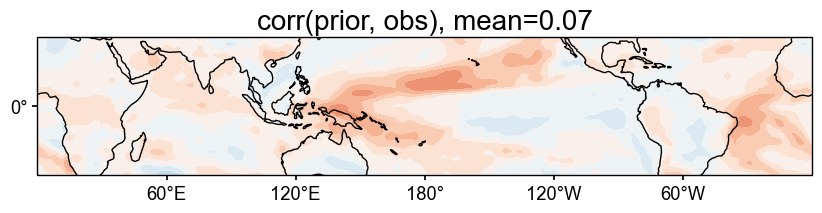

Figure saved at: "figs/corr_prior_obs.pdf"


In [14]:
# validate the prior against 20CR
stat = 'corr'

valid_fd = job.prior['tas'].compare(
    target, stat=stat,
    timespan=(1874, 2000),
)

fig, ax = valid_fd.plot(
    title=f'{stat}(prior, obs), mean={valid_fd.geo_mean().value[0,0]:.2f}',
    projection='PlateCarree',
    latlon_range=(-32, 32, 0, 360),
    plot_cbar=False,
)

cfr.showfig(fig)
cfr.savefig(fig, f'./figs/pda_{stat}_prior_obs.pdf')

/glade/work/fengzhu/conda-envs/cfr-env/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1872: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/glade/work/fengzhu/conda-envs/cfr-env/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1872: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


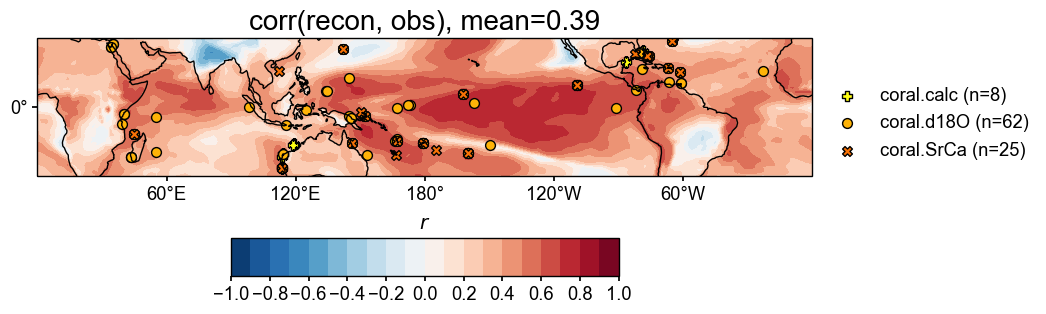

Figure saved at: "figs/pda_corr_recon_obs.pdf"


In [22]:
# validate the reconstruction against 20CR
valid_fd = res.recons['tas'].compare(
    target, stat=stat,
    timespan=(1874, 2000),
)
valid_fd.plot_kwargs.update({'cbar_orientation': 'horizontal', 'cbar_pad': 0.1})

fig, ax = valid_fd.plot(
    title=f'{stat}(recon, obs), mean={valid_fd.geo_mean().value[0,0]:.2f}',
    projection='PlateCarree',
    latlon_range=(-32, 32, 0, 360),
    plot_cbar=True,
    plot_proxydb=True, proxydb=job.proxydb.filter(by='tag', keys=['calibrated']),
    proxydb_lgd_kws={'loc': 'lower left', 'bbox_to_anchor': (1, 0)},
)

cfr.showfig(fig)
cfr.savefig(fig, f'./figs/pda_{stat}_recon_obs.pdf')

In [16]:
target_nino34 = target.index('nino3.4')

<Axes: xlabel='Year (CE)'>

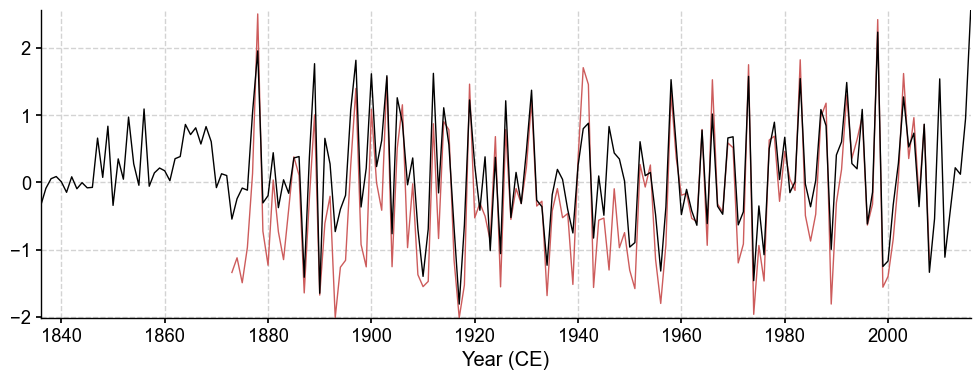

In [17]:
bc09 = cfr.EnsTS().fetch('BC09_NINO34')
bc09_ann = bc09.annualize(months=[12, 1, 2])
fig, ax = bc09_ann.plot()
target_nino34.plot(ax=ax, color='k')

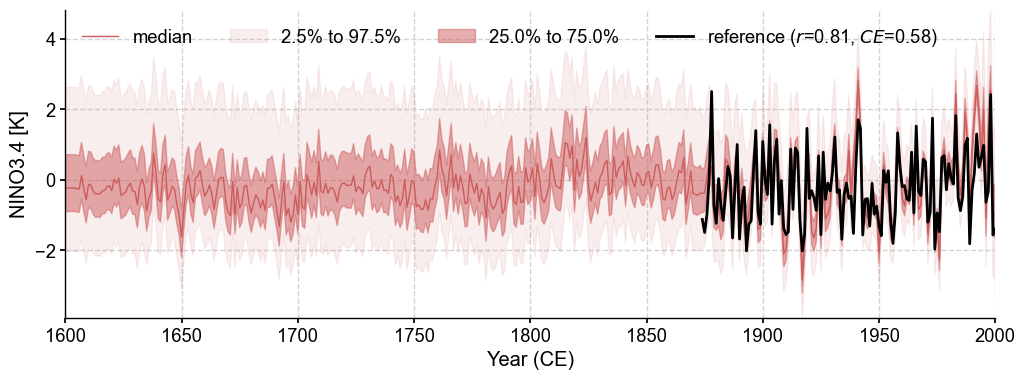

Figure saved at: "figs/corr_recon_BC09.pdf"


In [20]:
fig, ax = res.recons['nino3.4'].compare(bc09_ann, timespan=(1874, 2000)).plot_qs()
ax.set_xlim(1600, 2000)
ax.set_ylabel('NINO3.4 [K]')
cfr.showfig(fig)
cfr.savefig(fig, f'./figs/pda_corr_recon_BC09.pdf')